<a href="https://colab.research.google.com/github/paschmaria/Data-Science-Projects/blob/master/CNN_cats_and_dogs_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# !unzip data.zip

In [2]:
import numpy as np
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

%matplotlib inline

Using TensorFlow backend.


In [0]:
# to get reproducible results
import os
import random
import tensorflow as tf

os.environ['PYTHONHASHSEED'] = '0'
# set seed for numpy generated random numbers
np.random.seed(0)
random.seed(0)
tf.set_random_seed(0)

# Force tensorflow to use a single thread
session_conf = tf.ConfigProto(
      intra_op_parallelism_threads=1,
      inter_op_parallelism_threads=1)
sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
K.set_session(sess)

In [0]:
train_path = 'data/train'
test_path = 'data/test'
valid_path = 'data/valid'

In [5]:
train_batches = ImageDataGenerator().flow_from_directory(directory=train_path,
                                                         target_size=(224, 224),
                                                         classes=['dogs', 'cats'],
                                                         batch_size=10)
test_batches = ImageDataGenerator().flow_from_directory(directory=test_path,
                                                        target_size=(224, 224),
                                                        classes=['dogs', 'cats'],
                                                        batch_size=10)
valid_batches = ImageDataGenerator().flow_from_directory(directory=valid_path,
                                                         target_size=(224, 224),
                                                         classes=['dogs', 'cats'],
                                                         batch_size=4)

Found 40 images belonging to 2 classes.
Found 10 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [6]:
# to see the mapping of labels to image classes, we se class_indices
test_batches.class_indices

{'cats': 1, 'dogs': 0}

In [7]:
# to get the type of label arrays that are returned
train_batches.class_mode

'categorical'

In [0]:
# plots images with labels within jupyter notebook
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [0]:
imgs, labels = next(train_batches)

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


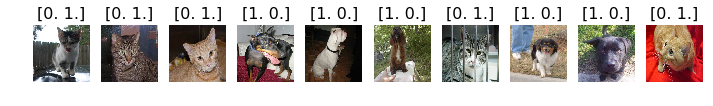

In [10]:
plots(imgs, titles=labels)

## Build and Train CNN

In [11]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    Flatten(),
    Dense(2, activation='softmax')
])

W0718 23:25:12.854423 139654284420992 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0718 23:25:12.857608 139654284420992 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0718 23:25:12.860592 139654284420992 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [12]:
model.compile(Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

W0718 23:25:12.920881 139654284420992 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0718 23:25:12.928951 139654284420992 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [13]:
model.fit_generator(train_batches, steps_per_epoch=4, validation_data=valid_batches, validation_steps=4, epochs=5, verbose=2)

W0718 23:25:13.031024 139654284420992 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0718 23:25:13.080260 139654284420992 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/5
 - 3s - loss: 5.0139 - acc: 0.6750 - val_loss: 6.0443 - val_acc: 0.6250
Epoch 2/5
 - 0s - loss: 7.2531 - acc: 0.5500 - val_loss: 10.0746 - val_acc: 0.3750
Epoch 3/5
 - 0s - loss: 7.2531 - acc: 0.5500 - val_loss: 7.0517 - val_acc: 0.5625
Epoch 4/5
 - 0s - loss: 7.2531 - acc: 0.5500 - val_loss: 11.0812 - val_acc: 0.3125
Epoch 5/5
 - 0s - loss: 6.8502 - acc: 0.5750 - val_loss: 8.0590 - val_acc: 0.5000


## Predict

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


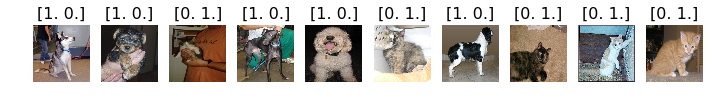

In [14]:
test_imgs, test_labels = next(test_batches)
plots(test_imgs, titles=test_labels)

In [15]:
test_labels = test_labels[:,0]
test_labels

array([1., 1., 0., 1., 1., 0., 1., 0., 0., 0.], dtype=float32)

In [16]:
predictions = model.predict_generator(test_batches, steps=1, verbose=0)
predictions

array([[1.000000e+00, 0.000000e+00],
       [1.000000e+00, 0.000000e+00],
       [1.000000e+00, 3.160895e-09],
       [1.000000e+00, 0.000000e+00],
       [1.000000e+00, 0.000000e+00],
       [1.000000e+00, 0.000000e+00],
       [1.000000e+00, 0.000000e+00],
       [1.000000e+00, 0.000000e+00],
       [1.000000e+00, 0.000000e+00],
       [1.000000e+00, 0.000000e+00]], dtype=float32)

In [0]:
cm = confusion_matrix(test_labels, predictions[:,0])

In [0]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    # Only use the labels that appear in the data
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Confusion matrix, without normalization
[[0 5]
 [0 5]]


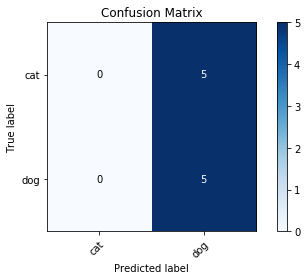

In [19]:
cm_plot_labels = ['cat', 'dog']
plot_confusion_matrix(cm, cm_plot_labels)

## Using a VGG-16 Model

In [20]:
vgg16_model = keras.applications.vgg16.VGG16()

W0718 23:25:18.654834 139654284420992 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



In [21]:
vgg16_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [22]:
type(vgg16_model)

keras.engine.training.Model

In [0]:
model = Sequential()
for layer in vgg16_model.layers[:-1]:
  model.add(layer)

In [24]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       295168    
__________

In [0]:
for layer in model.layers:
  layer.trainable = False

In [0]:
model.add(Dense(2, activation='softmax'))

In [27]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       295168    
__________

## Train the fine-tuned VGG16 model

In [0]:
model.compile(Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [29]:
model.fit_generator(train_batches, steps_per_epoch=4, validation_data=valid_batches, validation_steps=4, epochs=5, verbose=1)

Epoch 1/5
4/4 [==============================] - 3s 760ms/step - loss: 1.0374 - acc: 0.6000 - val_loss: 0.3535 - val_acc: 0.8750
Epoch 2/5
4/4 [==============================] - 0s 95ms/step - loss: 0.1743 - acc: 0.9000 - val_loss: 0.1036 - val_acc: 0.9375
Epoch 3/5
4/4 [==============================] - 0s 94ms/step - loss: 0.0427 - acc: 0.9750 - val_loss: 0.2092 - val_acc: 0.9375
Epoch 4/5
4/4 [==============================] - 0s 97ms/step - loss: 0.0169 - acc: 1.0000 - val_loss: 0.3124 - val_acc: 0.8750
Epoch 5/5
4/4 [==============================] - 0s 95ms/step - loss: 0.0118 - acc: 1.0000 - val_loss: 0.2659 - val_acc: 0.8750


## Predict using Fine-tuned VGG-16 Model

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


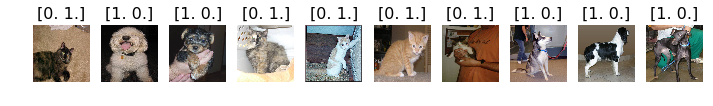

In [30]:
test_imgs, test_labels = next(test_batches)
plots(test_imgs, titles=test_labels)

In [0]:
test_labels = test_labels[:,0]

In [32]:
test_labels

array([0., 1., 1., 0., 0., 0., 0., 1., 1., 1.], dtype=float32)

In [0]:
predictions = model.predict_generator(test_batches, steps=1, verbose=0)

In [0]:
cm = confusion_matrix(test_labels, np.round(predictions[:,0]))

Confusion matrix, without normalization
[[4 1]
 [2 3]]


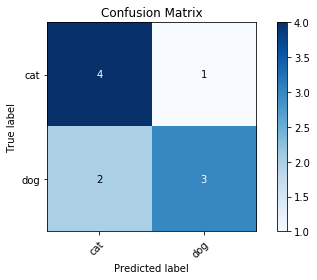

In [35]:
cm_plot_labels = ['cat', 'dog']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')

In [0]:
model.save("VGG16_cats_and_dogs.h5")